# <font color='DarkSlateBlue'>Intro Data Analysis</font> 

## <font color='NavyBlue'>Titanic Data</font>

### <font color='Red'> Eu, mulher, 33 anos na 2º classe sobreviveria?</font>

In [1]:
#importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np


In [2]:
#Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics

In [3]:
filename = 'C:/Nanodegree/Intro_Data_Analys/titanic_data.csv'
titanic_df = pd.read_csv(filename, header=0)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangler
Pontos focais:
- Idade
- Sexo
- Acompanhantes: SibSp + Parch
- Classe

Descrição dos campos:
- Embarked: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
- Parch: Número de pais e filhos a bordo
- Pclass: Classe que o passageiro embarcou (1 = 1º classe; 2 = 2º classe; 3 = 3º classe)
- Sex: Gênero feminino (female) ou male (masculino)
- Sibsp: Numero de irmãos e esposa a bordo
- Survived: 0 - Não sobreviveu e 1 = sobreviveu

In [5]:
# Verifica  o tipo dos dados criados
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Manipulando as variáveis

Acompanhantes

* As variáveis SibSp e Parch tem a mesma raiz de informação (total de acompanhantes), para facilitar a análise, será criada 
uma nova coluna Family com o total de acompanhantes. É possível que pessoas acompanhadas tenham maior probabilidade de não sobreviver porque tiveram que ajudar os familiares? Tendo toda a informação em uma só coluna facilitará a análise

In [30]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']

Valores nulos

* Primeiro passo é verificar se existem valores nulos e qual sua proporção

In [33]:
((len(titanic_df) - titanic_df.count()) / len(titanic_df)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Family          0.000000
dtype: float64

In [34]:
titanic_df.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

Cabin
* Esta variável contem a identificação da cabine. Com 77% de valores nulos, 147 valores únicos nos 204 valores totais, 
além de ter uma frequencia 4 nos registros mais repetidos, ela será excluída do contexto da análise. Mesmo considerando que seria cabível uma investigação, visto que, os valores listados como top, por exemplo, iniciam com a mesma letra, é possível que exista um padrão na nomenclatura das cabines que possa ser predito.


In [ ]:
#influencia de Age, Fare e Family na sobrevivência
titanic_df.groupby(['Pclass', 'Sex', 'Survived']).mean()

In [8]:
#Uma vez que o total de SEX é igual ao total de registros, posso testar o conteúdo de todos os valores
#titanic_df['Sex'] = (titanic_df.Sex == "male").astype(int)

Age tem valores nulos que serão substituidos pela idade média geral da coluna Age.

In [9]:
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

### Excluíndo colunas 
Colunas que não serão consideradas na análise: 
1. O conteúdo de SibSp e Parch estão armazenado na nova coluna Family
2. PassengerId, Ticket e Embarked não tem conteúdo significativo no contexto selecionado
3. O dado da coluna Cabin pode ser trabalhado, por exemplo, se for considerado a primeira letra do conteúdo, mas como faltam muitos valores, e não encontrei um forte vinculo dessa variável no resultado procurado, optei por excluí-la. 77.10% de nulos


In [10]:
#Calcula o % de nulos na coluna Cabin em relação ao total de registros
perc_null_cabin = (float(sum(titanic_df['Cabin'].isnull()))/float(titanic_df['PassengerId'].count()))*100
perc_null_cabin

77.10437710437711

In [11]:
#Apaga as colunas
titanic_df.drop(['PassengerId','SibSp', 'Parch', 'Cabin','Embarked', 'Ticket','Name'], axis=1, inplace=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


Será trabalhado com a relação da variavel Survived com Pclass, Sex, Age.

## Sumário estatístico
Aplicada aos valores númericos

- count: Total de elementos não nulos
- mean: Média
- std: Desvio Padrão
- min: Maior valor da amostra
- max: Menor valor da amostra
- 25%: Quartil 1, corresponde a 25% da amostra
- 50%: Quartil 2 ou mediana da amostra
- 75%: Quartil 3, corresponde a % da amostra

In [17]:
titanic_df.describe().fillna(0)

C:\Program Files (x86)\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.904602
std,0.486592,0.836071,14.526497,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


- Todas as linhas de todas as colunas estão preenchidas com 891 registros cada.
- A idade dos passageiros está entre 0.42 e 80 anos. 
- Para a maior parte dos passageiros (537) não foi registrado acompanhantes, mas por causa de passageiros com muitos acompanhantes a média registrada foi 0.9.

### Correlação de Pearson
Qual a corelação das variáveis como fator sobrevivência? O método pearson (.corr) foi utilizado para demonstrar a 
dependencia entre elas. O valor pode variar entre 0 e 1, tanto negativo quanto positivo.
Espera-se um grau de correlação superior a 0.5 para demonstrar uma correlação de moderada a muito forte.
    

In [ ]:
titanic_df.corr(method='pearson', min_periods=1)

Entre os valores demonstrados, Sex e Age são as variáveis mais correlacionadas com Survived.

# Visualizando os dados

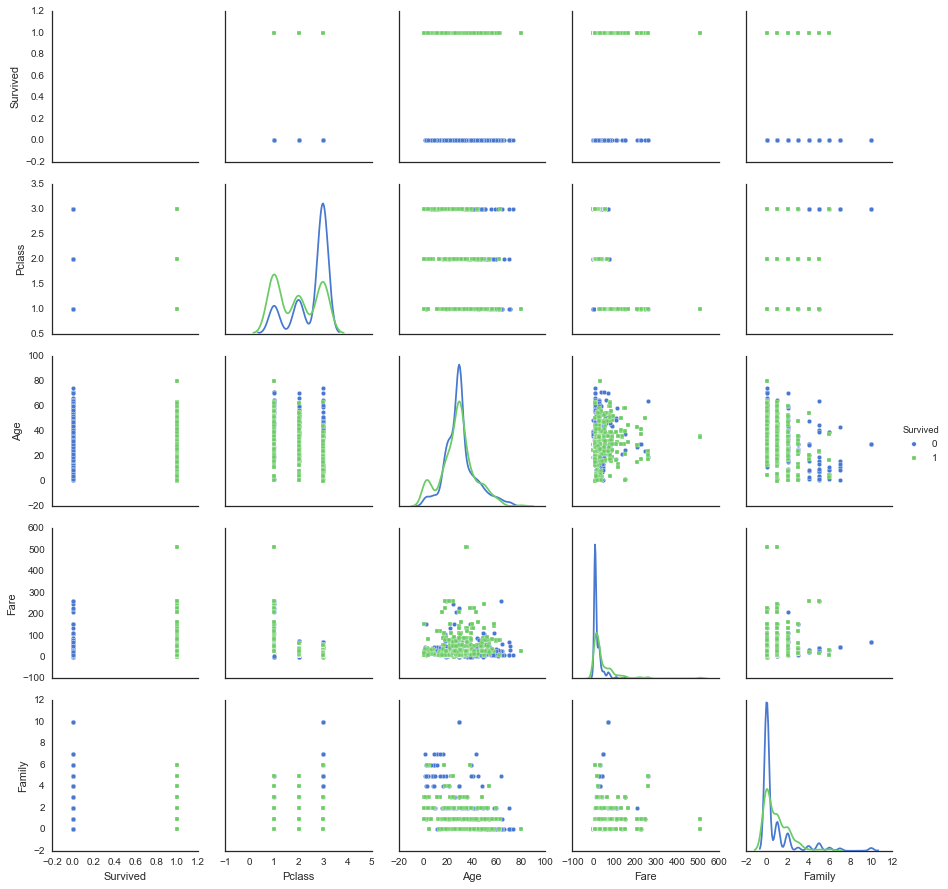

In [41]:
# Visão geral de todas as variáveis com a ajuda do pairplot(). Os dados estão divididos entre 0 -mortos e 1 - sobreviventes 
sb.pairplot(titanic_df, hue='Survived', diag_kind='kde', size=2.5, markers=['o','s'])

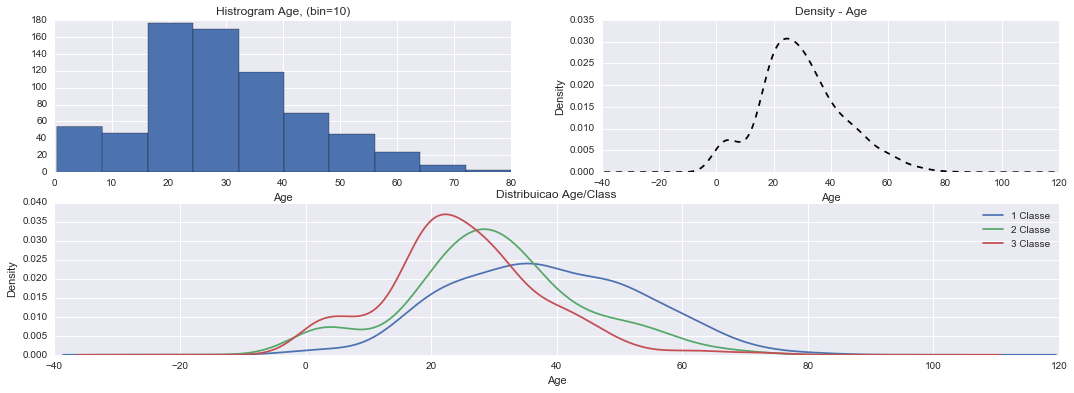

In [18]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

# criando o subplot1 
ax1 = plt.subplot(2,2,1)
#Histogram da coluna Age
titanic_df.Age.hist(bins=10) 
#Definindo o label de x - Age
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Histrogram Age, (bin=10)")    

# criando o subplot2 
ax2 = plt.subplot(2,2,2)
#Plotando o grafico de densidade da coluna Age
titanic_df['Age'].plot(kind='kde', style='k--')
#Definindo o label do eixo y
plt.ylabel("Density")
#Definindo o label do eixo de x
plt.xlabel("Age")
#Definindo o titulo do grafico
plt.title("Density - Age")

# criando o subplot3
ax3 = plt.subplot(2,2,(3,4))
#plotando a densidade por classe
titanic_df.groupby('Pclass').Age.plot.kde()
#Definindo o label do eixo de x
plt.xlabel("Age")  
#Definindo o titulo do grafico
plt.title("Distribuicao Age/Class")
#Definindo a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

### Com os dados preparados, começa a pesquisa para descobrir se uma mulher de 32 anos está na faixa média dos sobreviventes

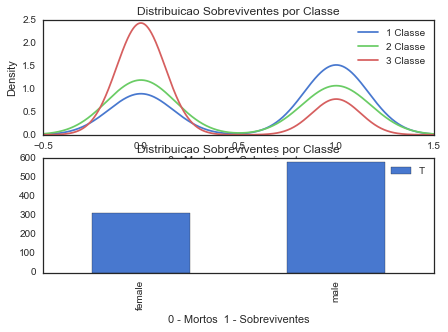

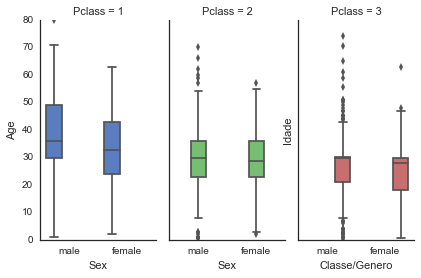

In [34]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
# tentar subplot com sb
sb.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.despine(left=True)

# Cria o subplot1 
ax1 = plt.subplot(3,1,1)
# Imprime gráfico com a densidade de sobreviventes por classe
titanic_df.groupby('Pclass').Survived.plot.kde()

# Define o label do eixo de x
plt.xlabel("0 - Mortos  1 - Sobreviventes")
# Define o título do gráfico
plt.title("Distribuicao Sobreviventes por Classe")
# Define a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

# Cria o subplot2 
ax2 = plt.subplot(3,1,2)
# Imprime gráfico com a densidade de sobreviventes por classe
#titanic_df.groupby('Survived').Sex.plot.kde()
titanic_df.groupby('Sex').count()['Survived'].plot.bar()
# Define o label do eixo de x
plt.xlabel("0 - Mortos  1 - Sobreviventes")
# Define o título do gráfico
plt.title("Distribuicao Sobreviventes por Classe")
# Define a legenda
plt.legend(('Total'),loc='best') 

# criando o subplot3
#ax3 = plt.subplot(3,1,3)
# Cria série com os dados de todos os sobreviventes
sobreviventes = titanic_df[titanic_df['Survived']==1]

# Para os sobreviventes, calcula a média da idade por classe e gênero  
#sobreviventes.groupby(['Pclass','Sex']).mean()['Age'].plot.bar()
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=titanic_df, kind="box", size=4, aspect=.5)

# Define configurações do grafico ax2
plt.xlabel("Classe/Genero")
plt.ylabel('Idade')
#plt.title("Idade media dos sobreviventes por classe/genero")   
##plt.legend('Media_Idade', loc='best') 



In [ ]:
grouped_yes

As mulheres na 2º classe que sobreviveram tinham uma media de idade de 28 anos. 
Mas a media pode ter sido influenciada por algum outlier
Quantas mulheres de 32 sobreviveram? qual a classe?

In [ ]:
#Pesquisando por mulheres com 32 anos idependente de ter sobrevivido ou da classe
titanic_df[(titanic_df.Age==32) &
          (titanic_df.Sex == 0 )]

A estatistica está a meu favor:
- 2 das 3 (66%) mulheres de 32 anos no Titanic sobreviveram
- A única mulher de 32 anos na segunda classe sobreviveu =)

In [ ]:
#Normaliza a idade. Qual o std de 32 anos?
def std_feature(df):
    #retorna o standard deviation do valor solicitado
    return (df - df.mean()) / df.std(ddof=0)

#Transforma os valores do titanic_df em seu desvio padrão
titanic_std = survived_yes.apply(std_feature) 
#Apura o desvio padrao para 32 anos 
std_32 = (32 - survived_yes.Age.mean())/survived_yes.Age.std(ddof=0) 

Imprime o gráfico com o std de cada idade, destacando 32 anos

In [ ]:
#Imprime scatter plot do std/Age
plt.scatter(titanic_std.Age, titanic_std.index, color='grey' )
plt.scatter(std_32, 0, color='red' )

#Configura gráfico
plt.xlabel("Id")
plt.ylabel('STD - Idade')
plt.title("Distribuicao do std/Age - sobreviventes")   
plt.legend(('Passageiros', 'Eu'),loc='best') 

Conforme visto através do método .describe(), existem outliers. 
Se existem outliers, qual a mediana das mulheres sobreviventes sobreviventes da 2º classe?

In [ ]:
#Pesquisa a mediana para registros com as características: Mulhere, na 2º classe, com 32 anos e que tenha sobrevivido
titanic_df[(titanic_df.Age==32) &
          (titanic_df.Sex == 0) &
          (titanic_df.Pclass == 2)&
          (titanic_df.Survived == 1)].median()

## <font color='Red'>Sim, eu teria sobrevivido.</font>

## Prevendo o resultado

In [ ]:
aux_df = titanic_df.copy()
#X recebe todos os valores do dataset menos a coluna Survived que será usada na comparação y
X = aux_df.drop(['Survived'], axis=1).values
#y recebe os valores da coluna Survived
y = aux_df['Survived'].values

#Divide as matrizes em teste e treino
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [ ]:
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
#cria a arvore de decisão 
decision_tree.fit(X_train, y_train)

In [ ]:
 # Acurácia média dos dados de teste
decision_tree.score (X_test, y_test)

Percentual de acurácia da árvore de decisão: 85%

In [ ]:
#Gera a representação GraphViz da decision tree. O dado é gravado no arquivo titanic_tree.dot
#Os dados podem ser visualizados graficamente em http://www.webgraphviz.com/
tree.export_graphviz(decision_tree, out_file='titanic_tree.dot')

O arquivo 'titanic_tree.dot' está no github: https://github.com/liebycardoso/Intro_Data_Analysis

A fim de facilitar a visualização, foi gerado a representação GraphViz da decision tree com max_depth=2. Nos testes foi utilizado max_depth=10.   

![alt text](Tree_depth2.jpg "tree")

In [ ]:
#cria o objeto Random Forest
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True)
#Treina o modelo de dados
random_forest.fit(X_train, y_train)

#Prediz o resultado
Y_pred = random_forest.predict(X_test)

In [ ]:
#Verifica a precisao do modelo.
random_forest.score(X_train, y_train)

Neste caso é possível prever a sobrevivência com 98% de precisao

In [ ]:
#Acuracia do resultado do modelo.82 da variável dependente pode ser explicada pelos features
random_forest.oob_score_

De acordo com o modelo utilizado, ranking de contribuição das colunas no resultado. 

In [ ]:
feat_import = pd.Series(random_forest.feature_importances_, index=aux_df.drop(['Survived'], axis=1).columns)
feat_import.sort_values()
feat_import

### BIBLIOGRAFIA

- Wes McKinney; Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython

Sites consultados:
- http://blog.socialcops.com/engineering/machine-learning-python
- http://developers.hekima.com/machine%20learning/python/2016/05/17/churn-prediction/
- http://hamelg.blogspot.com.br/2015/11/python-for-data-analysis-part-14.html
- http://nbviewer.jupyter.org/github/agconti/US_Dollar_Vehicle_Currency/blob/master/US_Dollar_Vehicle_Currency.ipynb
- http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://stackoverflow.com/questions/36288352/how-to-get-pandas-kde-density-with-horizontal-orientation
- http://work.caltech.edu/library/014.html
- http://work.caltech.edu/library/index.html
- http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
- http://www.reshamsarkar.com/projects/2016/3/30/titanic-trauma-data-cleaning-and-munging
- http://www.ultravioletanalytics.com/2014/11/03/kaggle-titanic-competition-part-ii-missing-values/
- https://github.com/agconti/kaggle-titanic/blob/master/Titanic.ipynb
- https://github.com/justmarkham/scikit-learn-videos
- https://www.dataquest.io/mission/3/list-operations
- https://www.kaggle.com/c/titanic
- https://www.youtube.com/watch?v=0GrciaGYzV0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017C26438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017FAA390>]], dtype=object)

In [ ]:
sb.set(style="ticks")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and sex
sb.boxplot(x="day", y="total_bill", hue="sex", data=titanic_df, palette="PRGn")
sb.despine(offset=10, trim=True)

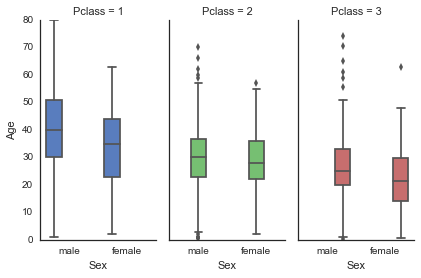

In [48]:
;

In [ ]:
fig = plt.figure(figsize=(18,6), dpi=1600) 

# Cria o subplot1 
ax1 = plt.subplot(2,2,1)
# Imprime gráfico com a densidade de sobreviventes por classe
titanic_df.groupby('Pclass').Survived.plot.kde()

# Define o label do eixo de x
plt.xlabel("0 - Mortos  1 - Sobreviventes")
# Define o título do gráfico
plt.title("Distribuicao Sobreviventes por Classe")
# Define a legenda
plt.legend(('1 Classe', '2 Classe','3 Classe'),loc='best') 

# Cria o subplot2 
ax2 = plt.subplot(2,2,2)
# Imprime gráfico com a densidade de sobreviventes por classe
#titanic_df.groupby('Survived').Sex.plot.kde()
titanic_df.groupby('Sex').count()['Survived'].plot.bar()
# Define o label do eixo de x
plt.xlabel("0 - Mortos  1 - Sobreviventes")
# Define o título do gráfico
plt.title("Distribuicao Sobreviventes por Classe")
# Define a legenda
plt.legend(('Mulheres','Homens'),loc='best') 

# criando o subplot3
ax3 = plt.subplot(2,2,(3,4))
# Cria série com os dados de todos os sobreviventes
sobreviventes = titanic_df[titanic_df['Survived']==1]

# Para os sobreviventes, calcula a média da idade por classe e gênero  
#sobreviventes.groupby(['Pclass','Sex']).mean()['Age'].plot.bar()
sb.factorplot(x="Sex", y="Age", hue="Pclass",
               col="Pclass", data=titanic_df, kind="box", size=3, aspect=.5)

# Define configurações do grafico ax2
plt.xlabel("Classe/Genero")
plt.ylabel('Idade')
plt.title("Idade media dos sobreviventes por classe/genero")   
plt.legend('Media_Idade', loc='best') 


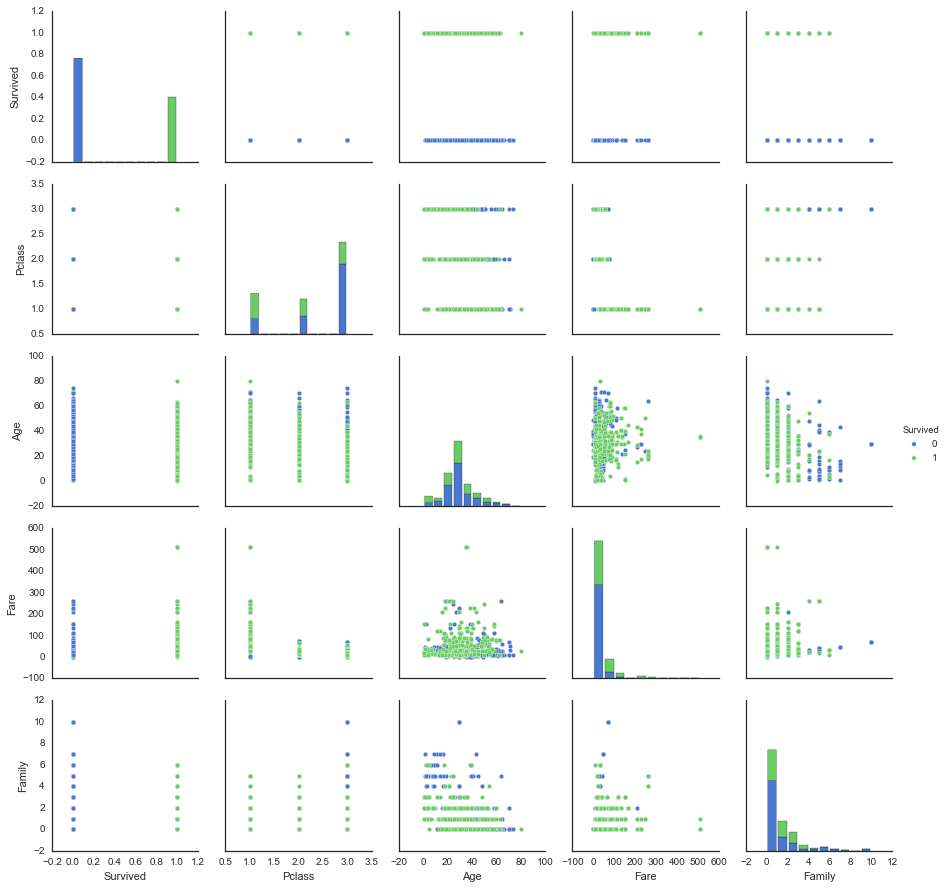

In [24]:
sb.pairplot(titanic_df, hue="Survived")

In [30]:
titanic_heatmap = titanic_df[['Survived','Age','Sex']]
sb.heatmap(titanic_heatmap, anoot=True, fmt='d', linewidths=.5)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''